<a href="https://colab.research.google.com/github/JinHeeeKang/Playdata_Python/blob/master/0917.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - LeNet
- 손글씨 숫자를 인식하는 네트워크


## Sequential을 이용해 모델 생성 및 학습
- fashion_mnist

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

#정규화
x_train,x_test=x_train/255.0,x_test/255.0

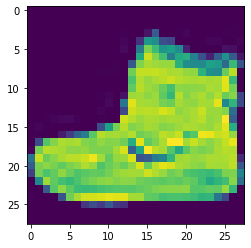

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

### 모델 안에서 이루어 지는 과정

    1.Input
    2.Convolutions  
    3.Subsampling(Pooling)  
    4.Convolutions     
    5.Subsampling(Pooling)  
    6.Fully connection(Dense)  
    7.Fully connection(Dense)  
    8.Fully connection(Output)  


### 필터
- 가중치를 곱해서 사이즈 줄이는 것  
- 이미지에 각각 필터를 다 넣어봄  
컨볼루션 연산을 해서 나온 output의 값이 신경망 어딘가에 저장되어있는게 아님
- 크기는 설정해주기 나름, 같을수도 다 다를수도있음   




In [ ]:
#필터가 (3,3)
model1=tf.keras.models.Sequential(
    [
        # 1.Input
        # 2.Convolutions(filter 수 : 6)
        tf.keras.layers.Conv2D(6,(3,3),activation='sigmoid',input_shape=(28,28,1)),

        # 3.Subsampling(Pooling)
        tf.keras.layers.MaxPool2D((2,2)),

        # 4.Convolutions(filter 수 : 16)
        tf.keras.layers.Conv2D(16,(3,3),activation='sigmoid'),

        # 5.Subsampling(Pooling)
        tf.keras.layers.MaxPool2D((2,2)),

        # 6.Fully connection(Dense)
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120,activation='sigmoid'),

        # 7.Fully connection(Dense)
        tf.keras.layers.Dense(84,activation='sigmoid'),

        # 8.Fully connection(Output)
        tf.keras.layers.Dense(10,activation='softmax')
                                  
])

- 책 p257 그림 7-27  모델 짜보기

    필터 5*5


In [ ]:
#필터가 (5,5)
model = tf.keras.models.Sequential(
   [ 
    # 1.Input
    # 2.Convolutions(filter 6)
    tf.keras.layers.Conv2D(6,(5,5),activation='sigmoid',input_shape=(28,28,1)),
    # 3.Subsampling(Pooling)
    tf.keras.layers.AveragePooling2D((2,2)),
    # 4.Convolutions(filter 16)
    tf.keras.layers.Conv2D(16,(5,5),activation='sigmoid'),
    # 5.Subsampling(Pooling)
    tf.keras.layers.AveragePooling2D((2,2)),
    # 6.Fully connection(Dense) 16*5*5 -> Flatten 하고 120개로 Fully connection
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120,activation='sigmoid'),
    # 7.Fully connection(Dense)
    tf.keras.layers.Dense(84,activation='sigmoid'),
    # 8.Fully connection(Output)
    tf.keras.layers.Dense(10,activation='softmax')
    
])

In [ ]:
model.build()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_19 (Dense)             (None, 84)               

### optimizer
- SGD 경사하강법



In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    # loss=tf.keras.losses.CategoricalCrossentropy(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
x_train=x_train[..., tf.newaxis] #차원 늘리기 ...은 전부를 가리킴
x_test=x_test[..., tf.newaxis]

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
history=model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3072 - accuracy: 0.1000 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3055 - accuracy: 0.1006 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3044 - accuracy: 0.1028 - val_loss: 2.3037 - val_accuracy: 0.1286
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2995 - accuracy: 0.1157 - val_loss: 2.2921 - val_accuracy: 0.1000
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2416 - accuracy: 0.1927 - val_loss: 2.0738 - val_accuracy: 0.3232
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7041 - accuracy: 0.4238 - val_loss: 1.3744 - val_accuracy: 0.5138
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2059 - accuracy: 0.5656 - val_loss: 1.0850 - val_accuracy:

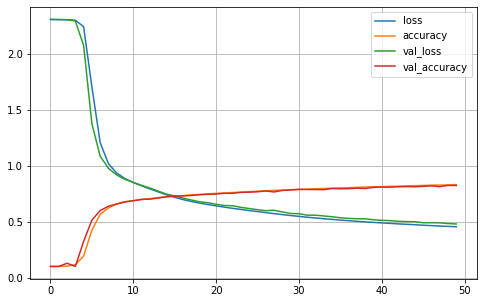

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

### optimizer
- Adam


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01,),
    # loss=tf.keras.losses.CategoricalCrossentropy(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
x_train=x_train[..., tf.newaxis] #차원 늘리기
x_test=x_test[..., tf.newaxis]
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
history2=model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8053 - accuracy: 0.6882 - val_loss: 0.5676 - val_accuracy: 0.7761
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4979 - accuracy: 0.8092 - val_loss: 0.4889 - val_accuracy: 0.8201
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4411 - accuracy: 0.8340 - val_loss: 0.4549 - val_accuracy: 0.8322
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4055 - accuracy: 0.8497 - val_loss: 0.4130 - val_accuracy: 0.8528
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3810 - accuracy: 0.8580 - val_loss: 0.4201 - val_accuracy: 0.8461
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3616 - accuracy: 0.8658 - val_loss: 0.4005 - val_accuracy: 0.8588
Epoch 7/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3533 - accuracy: 0.8685 - val_loss: 0.4083 - val_accuracy:

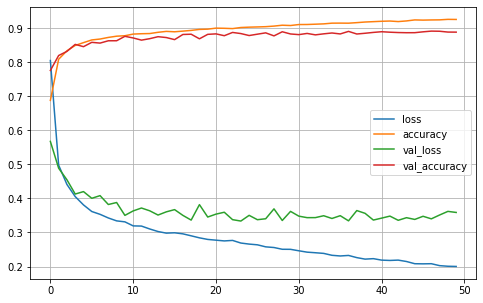

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## 실제 과정을 코드로 짜는 과정
- mnist 데이터

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# x_train shape=>(60000, 28, 28)  
# 실험에 사용할 첫번째 train image를 가져와서 shape 조절해주어야함

image=x_train[0]
image=image[tf.newaxis, ... ,tf.newaxis]

In [ ]:
image.shape

(1, 28, 28, 1)

In [ ]:
conv_layer1=tf.keras.layers.Conv2D(6,(5,5),activation='sigmoid',input_shape=(28,28,1))

In [ ]:
image=tf.cast(image,dtype=tf.float32)

In [ ]:
out1=conv_layer1(image)
out1

<tf.Tensor: shape=(1, 24, 24, 6), dtype=float32, numpy=
array([[[[0.49999046, 0.499995  , 0.4999907 , 0.4999951 , 0.49999797,
          0.49999976],
         [0.49999905, 0.49999702, 0.4999972 , 0.49999452, 0.499999  ,
          0.5       ],
         [0.5000003 , 0.49999964, 0.49999976, 0.49999928, 0.49999917,
          0.49999958],
         ...,
         [0.4999994 , 0.5000005 , 0.49999928, 0.500001  , 0.49999952,
          0.5000004 ],
         [0.49999547, 0.5000004 , 0.49999928, 0.49999976, 0.50000054,
          0.5000002 ],
         [0.5000043 , 0.5000002 , 0.49999928, 0.50000024, 0.4999957 ,
          0.5       ]],

        [[0.5000018 , 0.50000226, 0.5000111 , 0.500003  , 0.5000008 ,
          0.4999988 ],
         [0.50000197, 0.5000008 , 0.5000043 , 0.50000143, 0.5000005 ,
          0.499999  ],
         [0.5000005 , 0.5000005 , 0.5000019 , 0.50000066, 0.49999988,
          0.49999946],
         ...,
         [0.49136046, 0.53500485, 0.4258022 , 0.43312463, 0.48248065,
       

In [ ]:
#layer의 weight를 가져오는 함수
conv_layer1.get_weights()[0].shape,conv_layer1.get_weights()[1].shape

((5, 5, 1, 6), (6,))

In [ ]:
print(conv_layer1.get_weights()[0][:,:,0,0])

[[-0.16005483 -0.1344679   0.1655728  -0.12821206  0.18068428]
 [-0.1000622   0.15249439 -0.03077918 -0.01455826  0.04741356]
 [ 0.06825291  0.14701076  0.05545111  0.08449821 -0.11334219]
 [-0.17788924  0.07280008  0.17179663  0.16137557  0.01542741]
 [ 0.08951364 -0.09024516 -0.07360438  0.17611758 -0.12198515]]


In [ ]:
conv_layer1.get_weights()[0]

array([[[[-0.16005483, -0.07339787, -0.13810483, -0.17827217,
          -0.04952995,  0.04098155]],

        [[-0.1344679 , -0.04105157, -0.16248646,  0.02817525,
           0.07736082,  0.02749394]],

        [[ 0.1655728 , -0.1625518 , -0.07480292, -0.03350435,
           0.04150985,  0.16123118]],

        [[-0.12821206, -0.00789742, -0.18512906,  0.11494686,
           0.14490627,  0.17364924]],

        [[ 0.18068428, -0.06983992,  0.04307467,  0.12158664,
          -0.17130792, -0.12015029]]],


       [[[-0.1000622 ,  0.09477259, -0.02146493,  0.16280694,
           0.15635376,  0.03383921]],

        [[ 0.15249439,  0.10053892, -0.1092653 ,  0.06452698,
          -0.01204918, -0.03540292]],

        [[-0.03077918, -0.01812878, -0.02806242,  0.10133855,
          -0.15942416, -0.0297036 ]],

        [[-0.01455826,  0.13083513, -0.10293768, -0.05516009,
           0.09468724, -0.03550997]],

        [[ 0.04741356,  0.16013323, -0.04932369, -0.12069669,
           0.11328988,  0.0

In [ ]:
weights1=conv_layer1.get_weights()[0]

In [ ]:
weights1[:,:,0,0]

array([[-0.16005483, -0.1344679 ,  0.1655728 , -0.12821206,  0.18068428],
       [-0.1000622 ,  0.15249439, -0.03077918, -0.01455826,  0.04741356],
       [ 0.06825291,  0.14701076,  0.05545111,  0.08449821, -0.11334219],
       [-0.17788924,  0.07280008,  0.17179663,  0.16137557,  0.01542741],
       [ 0.08951364, -0.09024516, -0.07360438,  0.17611758, -0.12198515]],
      dtype=float32)

In [ ]:
weights1[:,:,0,1]

array([[-0.07339787, -0.04105157, -0.1625518 , -0.00789742, -0.06983992],
       [ 0.09477259,  0.10053892, -0.01812878,  0.13083513,  0.16013323],
       [ 0.02338372, -0.08173838, -0.06364325, -0.14078906,  0.13419913],
       [ 0.05414945,  0.00956465,  0.15619074, -0.12711109,  0.1446922 ],
       [ 0.06144227,  0.17526998, -0.18265058, -0.05615361,  0.1483853 ]],
      dtype=float32)

In [ ]:
# 필터 사이즈 확인
weights1[:,:,0,1].shape

(5, 5)

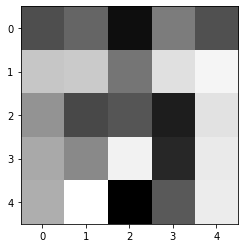

In [ ]:
#필터 한장을 이미지로 보여줌
plt.imshow(weights1[:,:,0,1],cmap='gray')

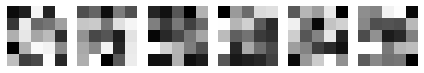

In [ ]:
#결과 확인
#subplot
fig,axs=plt.subplots(1,6)

for i in range(1):
    for j in range(6):
        axs[j].imshow(weights1[:,:,i,j],cmap='gray')
        axs[j].axis('off')#축의 값을 표현하지 않는것

plt.tight_layout()


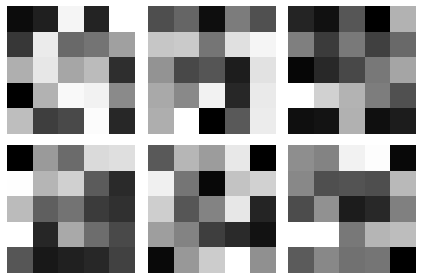

In [ ]:
#2행3열로 표현하는거
fig,axs=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        axs[i][j].imshow(weights1[:,:,0,(i*3)+j],cmap='gray')
        axs[i][j].axis('off')
plt.tight_layout()

In [ ]:
out1[0,:,:,0].shape # 필터 돌고 나와서 크기가 줄었다

TensorShape([24, 24])

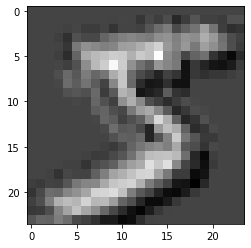

In [ ]:
plt.imshow(out1[0,:,:,0],cmap='gray')

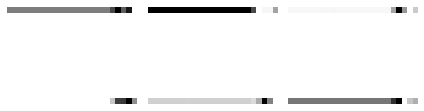

In [ ]:
#잘못 돌려서 맨위 시작 한줄만 나와서 신기해서..
fig,axs=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        axs[i][j].imshow(out1[:,:,0,(i*3)+j],cmap='gray')
        axs[i][j].axis('off')
plt.tight_layout()

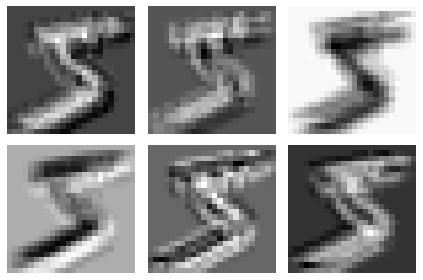

In [ ]:
fig,axs=plt.subplots(2,3)
for i in range(2):
    for j in range(3):
        axs[i][j].imshow(out1[0,:,:,(i*3)+j],cmap='gray')
        axs[i][j].axis('off')
plt.tight_layout()